In [2]:
import pandas as pd
import numpy as np
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [4]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
# load our dataset
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:

# Split-out validation dataset
array = df.values
x = array[:,0:4]
y = array[:,4]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

x_train

array([[5.1, 3.4, 1.5, 0.2],
       [5.5, 2.3, 4.0, 1.3],
       [5.7, 2.6, 3.5, 1.0],
       [5.4, 3.7, 1.5, 0.2],
       [7.0, 3.2, 4.7, 1.4],
       [5.0, 3.3, 1.4, 0.2],
       [5.0, 3.5, 1.6, 0.6],
       [7.7, 3.0, 6.1, 2.3],
       [5.0, 3.5, 1.3, 0.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3.0, 4.2, 1.5],
       [6.7, 3.3, 5.7, 2.1],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 2.5, 5.0, 1.9],
       [5.0, 3.2, 1.2, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.7, 1.0],
       [5.1, 2.5, 3.0, 1.1],
       [5.9, 3.0, 5.1, 1.8],
       [5.0, 2.0, 3.5, 1.0],
       [6.5, 3.0, 5.2, 2.0],
       [6.5, 3.0, 5.8, 2.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [11]:
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_predict =logistic_model.predict(x_test)
y_predict

array(['Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica'],
      dtype=object)

<AxesSubplot:>

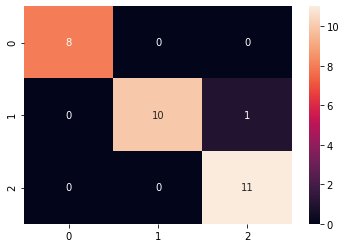

In [13]:
cm = confusion_matrix(y_test,y_predict)

sns.heatmap(cm ,annot=True)

In [14]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
print("accuracy :" , logistic_model.score(x_test,y_test))

accuracy : 0.9666666666666667


In [17]:
# Saving model to disk
import pickle
pickle.dump(logistic_model, open('logistic_model.pkl','wb'))